In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import math

In [2]:
# Defining modle metrics
from sklearn.metrics import r2_score
def R2(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [3]:
from sklearn.metrics import mean_squared_log_error
def MSLE(y_true, y_pred):
    return mean_squared_log_error(y_true, y_pred)

In [4]:
from sklearn.metrics import explained_variance_score
def EX_VAR(y_true, y_pred):
    return explained_variance_score(y_true, y_pred)

In [5]:
from sklearn.metrics import mean_absolute_error
def MAE(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [66]:
from sklearn.metrics import mean_squared_error
def RMSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred,squared=True)

In [7]:
# Reading Input data
data=pd.read_csv('final_data_2.csv')

In [8]:
print(data.index)
print(data.columns)

RangeIndex(start=0, stop=1382, step=1)
Index(['avg_outflow', 'avg_inflow', 'total_grid', 'Am', 'BOD', 'COD', 'TN',
       'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'year',
       'month', 'day'],
      dtype='object')


In [9]:
# Selected Features= {month,year,TN,Am,BOD,T,TM,H,PP,inflow }
data=data.drop(columns=['avg_outflow', 'COD','Tm', 'SLP', 'VV', 'V', 'VM', 'VG', 'day'])
data.columns

Index(['avg_inflow', 'total_grid', 'Am', 'BOD', 'TN', 'T', 'TM', 'H', 'PP',
       'year', 'month'],
      dtype='object')

In [10]:
scaler = MinMaxScaler()
scaler.fit(data)
normdata = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)

In [11]:
normdata2=normdata[normdata['total_grid']>0.4]
normdata3=normdata2[normdata['total_grid']<0.77]

F:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


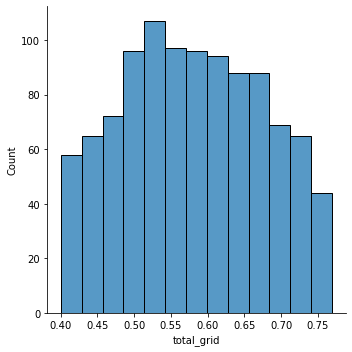

In [12]:
sns.displot(normdata3['total_grid'])

In [13]:
y=normdata3['total_grid']
x=normdata3.drop(columns=['total_grid'])

In [14]:
#x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=20)
x_train,x_test,y_train,y_test=x[:840],x[840:],y[:840],y[840:]

In [15]:
x.index

Int64Index([   5,   16,   17,   20,   21,   31,   38,   39,   42,   46,
            ...
            1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381],
           dtype='int64', length=1039)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(n_estimators=6000,learning_rate=0.001
                                ,min_samples_leaf=20 ,min_samples_split=30, max_depth=15)
GB.fit(x_train,y_train)
y_pred_GBM=GB.predict(x_test)
y_pred_GBM_train=GB.predict(x_train)
y_pred_GBM2=GB.predict(x)
print ( 'R2_GBM_Test= ',R2(y_test,y_pred_GBM.flatten()) )
print ( 'R2_GBM_ALL= ',R2(y, y_pred_GBM2.flatten()) )

R2_GBM_Test=  0.016116712248002707
R2_GBM_ALL=  0.6625576451523152


In [17]:
from sklearn import metrics
print('MSE = ',metrics.mean_squared_error(y_test,y_pred_GBM))
print('MAE = ', metrics.mean_absolute_error(y_test,y_pred_GBM))

MSE =  0.00860360455524536
MAE =  0.07515200967088977


In [18]:
from sklearn.ensemble import RandomForestRegressor
regressior= RandomForestRegressor(bootstrap=True,max_depth= 30, max_features='auto'
                                  ,min_samples_leaf= 5,min_samples_split= 5,n_estimators= 2000)
regressior.fit(x_train,y_train)
y_pred_RF=regressior.predict(x_test)
y_pred_RF2=regressior.predict(x)
y_pred_RF_train=regressior.predict(x_train)
print ( 'R2_RF_Test= ',R2(y_test,y_pred_RF.flatten()) )
print ( 'R2_RF_ALL= ',R2(y, y_pred_RF2.flatten()) )

R2_RF_Test=  -0.010209030894103632
R2_RF_ALL=  0.5346695056050697


In [19]:
from sklearn import metrics
print('MSE_test = ',metrics.mean_squared_error(y_test,y_pred_RF))
print('MAE_test = ', metrics.mean_absolute_error(y_test,y_pred_RF))

MSE_test =  0.00883381101005277
MAE_test =  0.07587723766517798


In [20]:
x_train.shape

(840, 10)

In [57]:
from keras.models import Sequential
from keras.layers import Dense , LSTM
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(16, input_dim = 10, activation='relu'))

# Adding the second hidden layer
model.add(Dense(units = 10, activation = 'relu'))
# Adding the second hidden layer
model.add(Dense(units = 4, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [58]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train , epochs=80, verbose=2)

Epoch 1/80
27/27 - 0s - loss: 0.3702 - mae: 0.3702
Epoch 2/80
27/27 - 0s - loss: 0.1189 - mae: 0.1189
Epoch 3/80
27/27 - 0s - loss: 0.1007 - mae: 0.1007
Epoch 4/80
27/27 - 0s - loss: 0.0944 - mae: 0.0944
Epoch 5/80
27/27 - 0s - loss: 0.0899 - mae: 0.0899
Epoch 6/80
27/27 - 0s - loss: 0.0869 - mae: 0.0869
Epoch 7/80
27/27 - 0s - loss: 0.0851 - mae: 0.0851
Epoch 8/80
27/27 - 0s - loss: 0.0840 - mae: 0.0840
Epoch 9/80
27/27 - 0s - loss: 0.0830 - mae: 0.0830
Epoch 10/80
27/27 - 0s - loss: 0.0824 - mae: 0.0824
Epoch 11/80
27/27 - 0s - loss: 0.0816 - mae: 0.0816
Epoch 12/80
27/27 - 0s - loss: 0.0811 - mae: 0.0811
Epoch 13/80
27/27 - 0s - loss: 0.0810 - mae: 0.0810
Epoch 14/80
27/27 - 0s - loss: 0.0809 - mae: 0.0809
Epoch 15/80
27/27 - 0s - loss: 0.0818 - mae: 0.0818
Epoch 16/80
27/27 - 0s - loss: 0.0799 - mae: 0.0799
Epoch 17/80
27/27 - 0s - loss: 0.0797 - mae: 0.0797
Epoch 18/80
27/27 - 0s - loss: 0.0792 - mae: 0.0792
Epoch 19/80
27/27 - 0s - loss: 0.0788 - mae: 0.0788
Epoch 20/80
27/27 - 0

In [62]:
y_pred_ANN=model.predict(x_test)
y_pred_ANN_train=model.predict(x_train)
y_pred_ANN2=model.predict(x)
print ( 'R2_ANN_Test= ',R2(y_test,y_pred_ANN.flatten()) )
print ( 'R2_ANN_ALL= ',R2(y, y_pred_ANN2.flatten()) )

R2_ANN_Test=  -0.2679469086517807
R2_ANN_ALL=  0.09656406787634864


In [60]:
xx=x_train.to_numpy()
x_train2=np.reshape(xx,(xx.shape[0],xx.shape[1],1))

In [25]:
x_train2.shape

(840, 10, 1)

In [74]:
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 10, return_sequences =True, batch_input_shape=(None, 10,1)))
#model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
#model.add(LSTM(units = 10, return_sequences = True))
#model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
#model.add(LSTM(units = 50, return_sequences =True))
#model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 10, return_sequences =False))
#model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [75]:
xxt=x_test.to_numpy()
x_test2=np.reshape(xxt,(xxt.shape[0],xxt.shape[1],1))
model.fit(x_train2,y_train, validation_data=(x_test2,y_test), epochs=60)

Epoch 1/60
27/27 [==============================] - 5s 50ms/step - loss: 0.2120 - mse: 0.2120 - mae: 0.4388 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.1026
Epoch 2/60
27/27 [==============================] - 0s 14ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.1005 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0875
Epoch 3/60
27/27 [==============================] - 0s 14ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0904 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0878
Epoch 4/60
27/27 [==============================] - 0s 14ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0927 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0860
Epoch 5/60
27/27 [==============================] - 0s 14ms/step - loss: 0.0108 - mse: 0.0108 - mae: 0.0869 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0869
Epoch 6/60
27/27 [==============================] - 0s 14ms/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0873 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0855
Epoch 7/60
27/27 [====

27/27 [==============================] - 0s 13ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0784 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0735
Epoch 52/60
27/27 [==============================] - 0s 13ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0793 - val_loss: 0.0083 - val_mse: 0.0083 - val_mae: 0.0748
Epoch 53/60
27/27 [==============================] - 0s 13ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0770 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0735
Epoch 54/60
27/27 [==============================] - 0s 12ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0757 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0734
Epoch 55/60
27/27 [==============================] - 0s 12ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0750 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0734
Epoch 56/60
27/27 [==============================] - 0s 12ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0757 - val_loss: 0.0086 - val_mse: 0.0086 - val_mae: 0.0756
Epoch 57/60
27/27 [=========

In [76]:
y_pred_RNN_train=model.predict(x_train2)
y_pred_RNN=model.predict(x_test2)
#y_pred_RNN2=model.predict(x)
print ( 'R2_RNN_Test= ',R2(y_test,y_pred_RNN.flatten()) )
print ( 'R2_RNN_Train= ',R2(y_train,y_pred_RNN_train.flatten()) )
#print ( 'R2_RNN_ALL= ',R2(y, y_pred_RNN2) )
#y_pred_RNN[:,0].shape

R2_RNN_Test=  0.058407424796035556
R2_RNN_Train=  0.11316337938160914


In [29]:
y_pred_RNN.flatten().shape

(199,)

In [30]:
x.index

Int64Index([   5,   16,   17,   20,   21,   31,   38,   39,   42,   46,
            ...
            1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381],
           dtype='int64', length=1039)

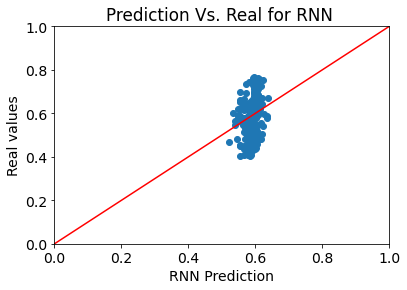

In [31]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_pred_RNN.flatten(),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("RNN Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for RNN ')
plt.plot((0,1),(0,1), color='red')

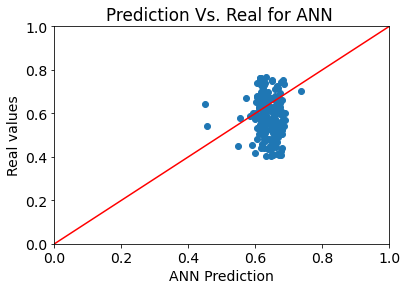

In [32]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_pred_ANN.flatten(),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("ANN Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for ANN ')
plt.plot((0,1),(0,1), color='red')

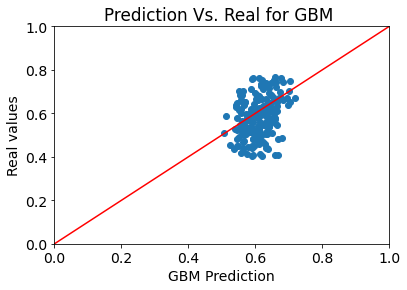

In [33]:
plt.rcParams.update({'font.size': 14})
plt.scatter(GB.predict(x_test),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("GBM Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for GBM ')
plt.plot((0,1),(0,1), color='red')

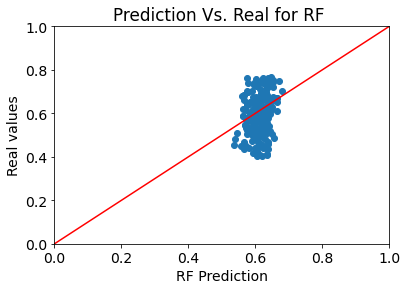

In [34]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_pred_RF.flatten(),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("RF Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for RF ')
plt.plot((0,1),(0,1), color='red')

In [35]:
scaler_y = MinMaxScaler()
y_for_scale=pd.DataFrame(data['total_grid'])
scaler_y.fit(y_for_scale)
def invers_result(y_pred):
    y_pred=pd.DataFrame(y_pred)
    return scaler_y.inverse_transform(y_pred)/1000

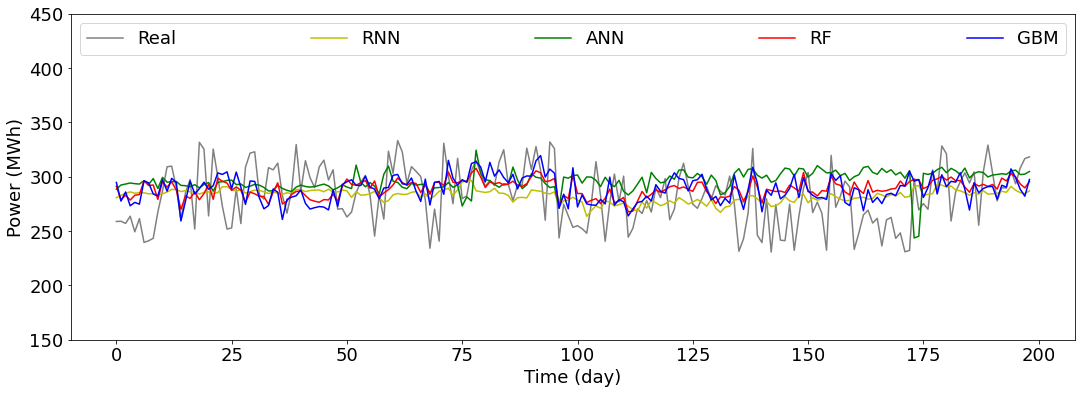

In [36]:
time=list(range(len(y_test)))
plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(18,6), )


#plt.xlim(700,832), plt.ylim(40, 160)
#plt.plot([800,800],[0,500],  linestyle=':',color = 'k')
plt.plot(time,invers_result(y_test), color = 'gray', label = 'Real')
plt.plot(time,invers_result(y_pred_RNN.flatten()), color = 'y', label = 'RNN')
plt.plot(time,invers_result(y_pred_ANN.flatten()), color = 'green', label = 'ANN')
plt.plot(time,invers_result(y_pred_RF.flatten()), color = 'red', label = 'RF')
plt.plot(time,invers_result(GB.predict(x_test)), color = 'blue', label = 'GBM')


plt.xlabel("Time (day)")
plt.ylabel("Power (MWh)")
#plt.title('Daily Prediction ')
plt.ylim((150,450))
plt.legend(loc='upper center', mode='expand',ncol=5)
plt.savefig('zoom-Scenario I.png')
plt.show()

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'RNN Error Distribution')

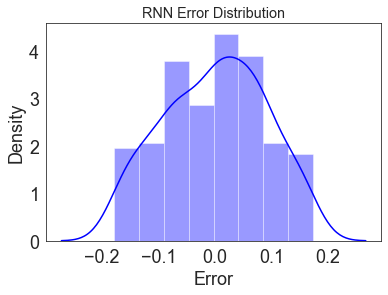

In [37]:
sns.set_style("white")
ax = sns.distplot(y_test-y_pred_RNN.flatten(), color='blue')
plt.rcParams.update({'font.size': 12})
plt.xlabel('Error')
plt.title('RNN Error Distribution')

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ANN Error Distribution')

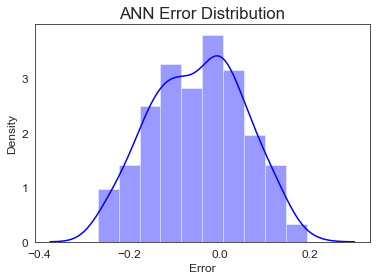

In [38]:

sns.set_style("white")
ax = sns.distplot(y_test-y_pred_ANN.flatten(), color='blue')
plt.rcParams.update({'font.size': 14})
plt.xlabel('Error')
plt.title('ANN Error Distribution')

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'RF Error Distribution')

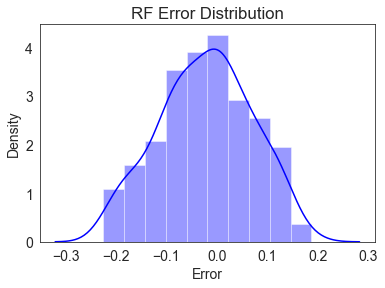

In [39]:
plt.rcParams.update({'font.size': 14})

sns.set_style("white")
ax = sns.distplot(y_test-y_pred_RF.flatten(), color='blue')
plt.xlabel('Error')
plt.title('RF Error Distribution')

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GBM Error Distribution')

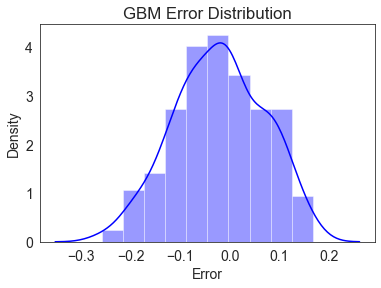

In [40]:
plt.rcParams.update({'font.size': 14})

sns.set_style("white")
ax = sns.distplot(y_test-GB.predict(x_test), color='blue')
plt.xlabel('Error')
plt.title('GBM Error Distribution')

In [69]:
result=pd.DataFrame()
result['ML_Type']=['GBM','RF','ANN','RNN']

result['RMSE_Test']=[RMSE(y_test,GB.predict(x_test)),RMSE(y_test,y_pred_RF.flatten())
                    ,RMSE(y_test,y_pred_ANN.flatten()),RMSE(y_test,y_pred_RNN.flatten())]
result['RMSE_Train']=[RMSE(y_train,GB.predict(x_train)),RMSE(y_train,y_pred_RF_train.flatten())
                     ,RMSE(y_train,y_pred_ANN_train.flatten()),RMSE(y_train,y_pred_RNN_train.flatten())]
j2=[]
for i in range(len(result["RMSE_Test"])):
    j2.append(result["RMSE_Test"][i]**2/result["RMSE_Train"][i]**2)
    
result['J_2']=j2

result['MAE_Test']=[MAE(y_test,GB.predict(x_test)),MAE(y_test,y_pred_RF.flatten())
                    ,MAE(y_test,y_pred_ANN.flatten()),MAE(y_test,y_pred_RNN.flatten())]
result['MAE_Train']=[MAE(y_train,GB.predict(x_train)),MAE(y_train,y_pred_RF_train.flatten())
                     ,MAE(y_train,y_pred_ANN_train.flatten()),MAE(y_train,y_pred_RNN_train.flatten())]

result['MSLE_Test']=[MSLE(y_test,GB.predict(x_test)),MSLE(y_test,y_pred_RF.flatten())
                     ,MSLE(y_test,y_pred_ANN.flatten()),MSLE(y_test,y_pred_RNN.flatten())]
result['MSLE_Train']=[MSLE(y_train,GB.predict(x_train)),MSLE(y_train,y_pred_RF_train.flatten())
                      ,MSLE(y_train,y_pred_ANN_train.flatten()),MSLE(y_train,y_pred_RNN_train.flatten())]

result['Ex_Var_Test']=[EX_VAR(y_test,GB.predict(x_test)),EX_VAR(y_test,y_pred_RF.flatten())
                       ,EX_VAR(y_test,y_pred_ANN.flatten()),EX_VAR(y_test,y_pred_RNN.flatten())]
result['Ex_Var_Train']=[EX_VAR(y_train,GB.predict(x_train)),EX_VAR(y_train,y_pred_RF_train.flatten())
                        ,EX_VAR(y_train,y_pred_ANN_train.flatten()),EX_VAR(y_train,y_pred_RNN_train.flatten())]

In [70]:
result

,ML_Type,RMSE_Test,RMSE_Train,J_2,MAE_Test,MAE_Train,MSLE_Test,MSLE_Train,Ex_Var_Test,Ex_Var_Train
0,GBM,0.008604,0.001793,23.035587,0.075152,0.033805,0.003481,0.000719,0.070185,0.806399
1,RF,0.008834,0.003190,7.669029,0.075877,0.046005,0.003580,0.001282,0.046477,0.655493
2,ANN,0.011088,0.007630,2.111909,0.085611,0.071007,0.004495,0.003057,0.046771,0.178008
3,RNN,0.008054,0.008458,0.906622,0.074787,0.077782,0.003226,0.003389,0.079010,0.088490


In [71]:
result.to_csv('metric_results.csv')